# Turo Analysis
Here at Turo we pride ourselves on being data-driven marketers. 
We study our customer data to understand their behaviors and determine the best ways to fuel growth.

## Given two data sets (vehicles.csv and reservations.csv) find:
1. Which factors seem to be most important in driving total number of reservations for our vehicles?

## General Hypothesis:
From a practical standpoint, it's my assumption that the price of a vehicles will be the most important factor driving the total number of reservations for a vehicle, followed by the number of images, and year of car. I believe that people want to get as much value as possible, while paying the least amount of money.

Let's analyze the datasets and come up with our own conclusion.   

In [ ]:
#Importing all necessary modules for analysis
#!/usr/bin/python3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# Version Checks
print("Numpy Version ->", np.__version__)
print("Panda Version ->", pd.__version__)
print("Seaborn Version ->", sns.__version__)

Numpy Version -> 1.13.3
Panda Version -> 0.23.4
Seaborn Version -> 0.9.0


In [92]:
# Using pandas to convert the vehicles.csv file into a DataFrame
vehicles = pd.read_csv('Data/vehicles.csv', index_col=None)

# Check for values in vehicles.csv DataFrame
vehicles.head()

,vehicle_id,is_delivery,actual_price,recommended_price,num_images,description_length,is_recent_model
0,293264,1,88,63,2,112,0
1,297206,1,23,26,1,149,0
2,265941,1,43,42,8,73,1
3,345616,1,32,35,6,49,1
4,320164,0,47,41,5,251,1


In [93]:
# Check for Null values in vehicles DataFrame
vehicles.isnull().sum()

vehicle_id            0
is_delivery           0
actual_price          0
recommended_price     0
num_images            0
description_length    0
is_recent_model       0
dtype: int64

In [94]:
# Using pandas to convert the reservations.csv file into a Data Frame
reservations = pd.read_csv('Data/reservations.csv', index_col=None, header=0)

# Check for values in reservations.csv DataFrame
reservations.head()

,vehicle_id,reservation_id,reservation_type
0,219798,2748251,2
1,345928,2748627,1
2,380701,2794832,2
3,335521,2799910,2
4,344766,2811799,2


In [95]:
# Check for Null values in vehicles DataFrame
reservations.isnull().sum()

vehicle_id          0
reservation_id      0
reservation_type    0
dtype: int64

In [96]:
# Create a results variables to hold merged Pandas Dataframe on the vehicle_id column
# Used innerjoin to avoid NaN values and join on relevant vehicle_id values
result = pd.merge(v, r, how='inner', on='vehicle_id')

# Check for values in results DataFrame
result.head()

,vehicle_id,is_delivery,actual_price,recommended_price,num_images,description_length,is_recent_model,reservation_id,reservation_type
0,293264,1,88,63,2,112,0,2200950,1
1,293264,1,88,63,2,112,0,3126776,2
2,293264,1,88,63,2,112,0,2930801,2
3,293264,1,88,63,2,112,0,3262917,2
4,293264,1,88,63,2,112,0,3345948,2


In [99]:
# Check for Null values in result DataFrame
result.isnull().sum()

vehicle_id            0
is_delivery           0
actual_price          0
recommended_price     0
num_images            0
description_length    0
is_recent_model       0
reservation_id        0
reservation_type      0
dtype: int64

In [100]:
# Value type check for result DataFrame
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192446 entries, 0 to 192445
Data columns (total 9 columns):
vehicle_id            192446 non-null int64
is_delivery           192446 non-null int64
actual_price          192446 non-null int64
recommended_price     192446 non-null int64
num_images            192446 non-null int64
description_length    192446 non-null int64
is_recent_model       192446 non-null int64
reservation_id        192446 non-null int64
reservation_type      192446 non-null int64
dtypes: int64(9)
memory usage: 14.7 MB


### Below we are checking for general correlation between two axis units via a seaborn pairplot with linear regression lines. Our goal is to find which factors seem to be most important in driving total number of reservations for our vehicles

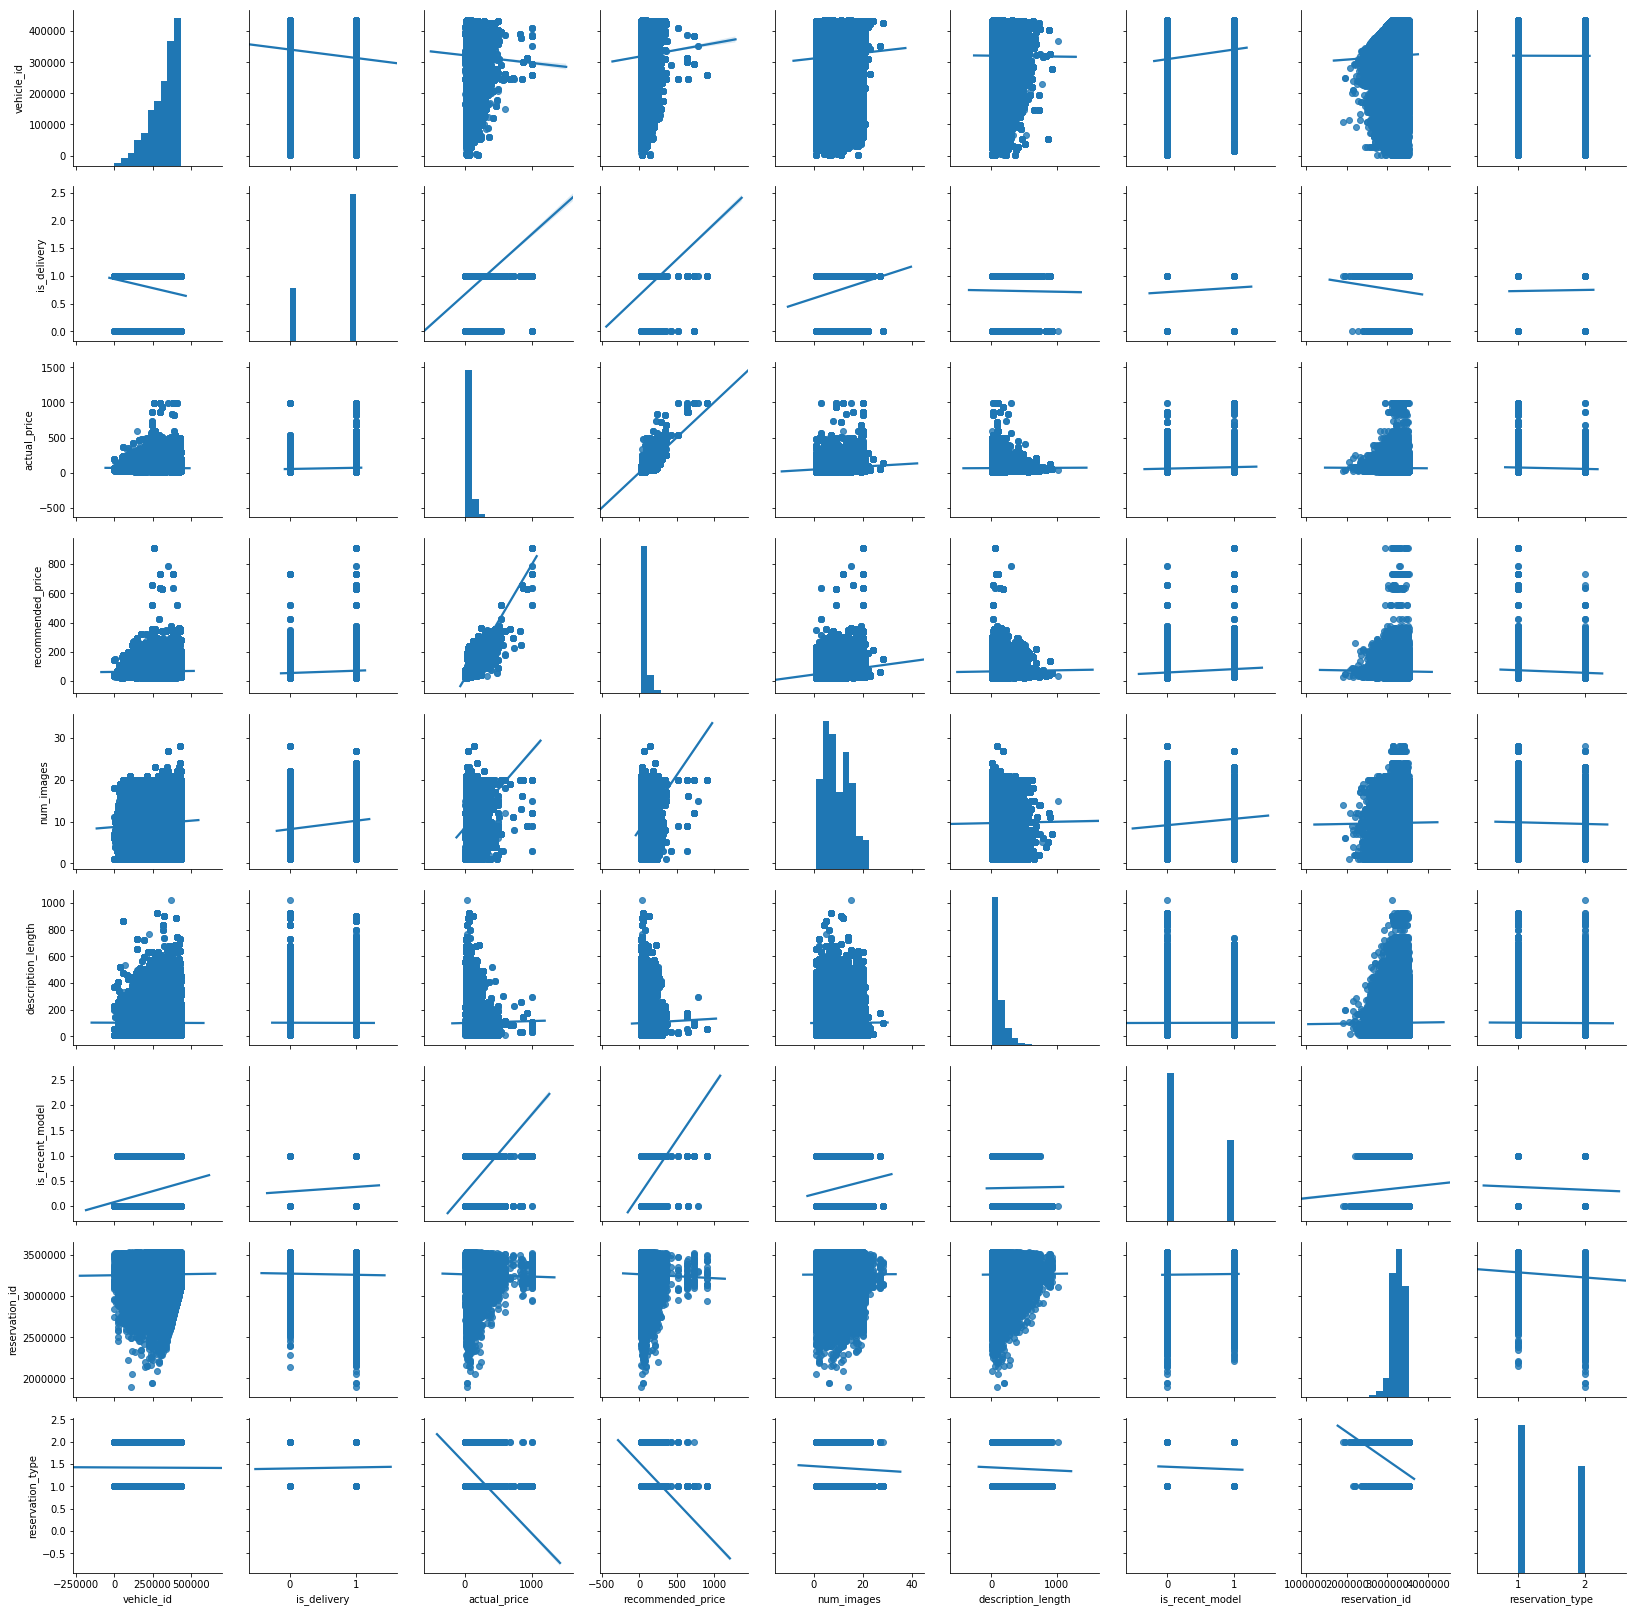

In [119]:
# Initially, we can see that there is a linear positive correlation between recommended_price and actual_price.
# I'll ignore any plot with two data points (Ex: 0, 1) because it will skew the linear regression line.
sns.pairplot(result, kind='reg')

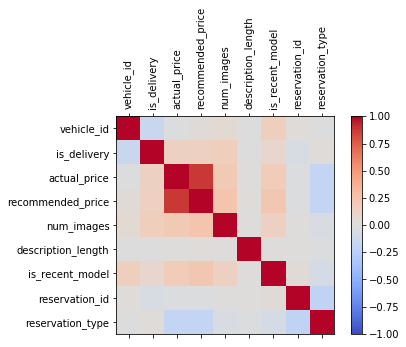

In [133]:
# Let's create a correlation heat map to confirm our pairplots assumptions.

corr = result.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(result.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(result.columns)
ax.set_yticklabels(result.columns)
plt.show()

### Great. Now we can look for correlation based on the heat map and the paired plot maps above.
### It looks like there is a high degree of correlation between recommended_price and the actual_price.

### Based on the heat map and pair plot, it looks like there is a degree of correlation between:
1. recommended_price and actual_price,
2. recommended_price and num_images 
3. recommended_price and is_recent_model

### Below are three cells that visually explain the correlation between two different variables.

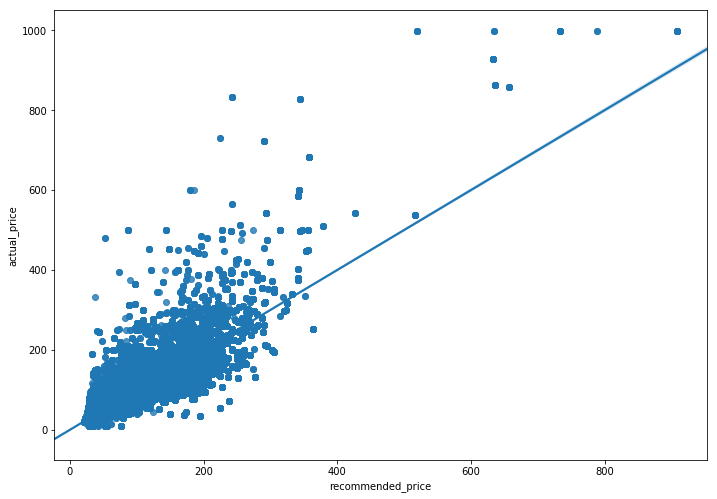

In [134]:
# The Jupyter cell below is used to visualize the linear relationship determined through Regression Plots.

# Regression plot for recommended_price and actual_price
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.regplot(x='recommended_price', y='actual_price', data=result)

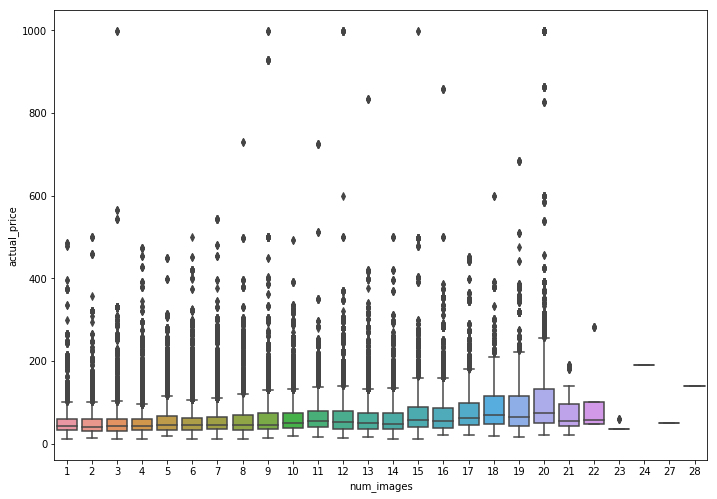

In [145]:
# The Jupyter cell below is used to visualize the relationship between actual_price and number of images.

# There's a very slight increase in price with an increase in number of images, but the median price is pretty constant
# There seems to be a slight variation in upper quartile of price when there are 18 to 20 images.

# Boxplot for number of images and acutal price
num_images = result[result['num_images'] >= 0]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
axl = sns.boxplot(x='num_images', y='actual_price', data=num_images)

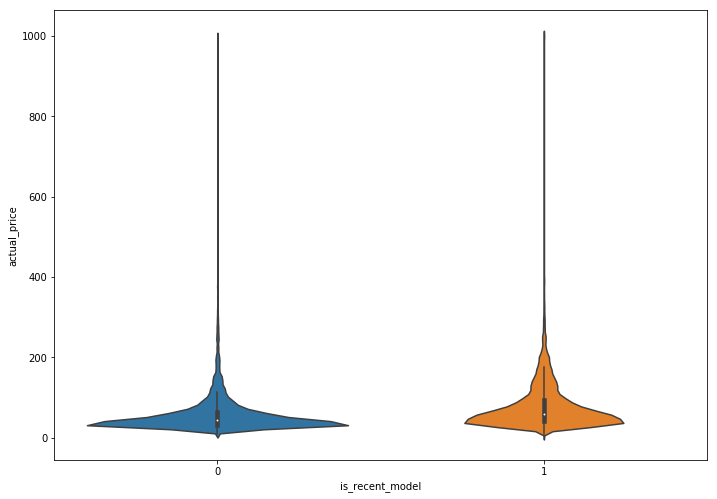

In [140]:
# The Jupyter cell below is used to visualize the relationship between is_recent_model and actual_price
# Based on the two violin plots below, there are more reservations with older models then newer models. 
# There is a commonality between the two plots. Users all want to rent within the $50 range / day

# The ViolinPlot below shows how the is_recent_model and actual_price is distributed. 

# Creates a Series that finds all the recent models
recent_model = result[result['is_recent_model'] <= 1]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
axl = sns.violinplot(x='is_recent_model', y='actual_price', data=recent_model)

## Conclusion:

### After testing my hypothesis, I've found that there is a strong correlation between the actual_price and recommended_price
1. In order to increase your rentals, it's best that you price your car close to Turo's recommended_price
2. I would also suggest you have at least 18-20 images, which could possibly lead to an increase in price

## Further Analysis:
### I'm curious about the pricing of each car and wanted to find the variation in pricing based on reservation types. (1,2)

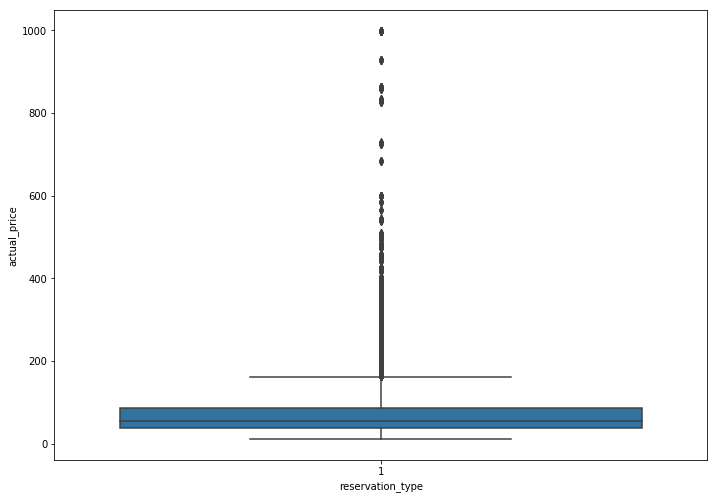

In [124]:
# Below you can see the median and lower/upper quartile of prices for vehicles with reservation_type == 1
# Building a Panda Series where all the reservation_type's are 1
res_1 = result[result['reservation_type'] == 1]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax1 = sns.boxplot(x="reservation_type", y="actual_price", data=res_1)

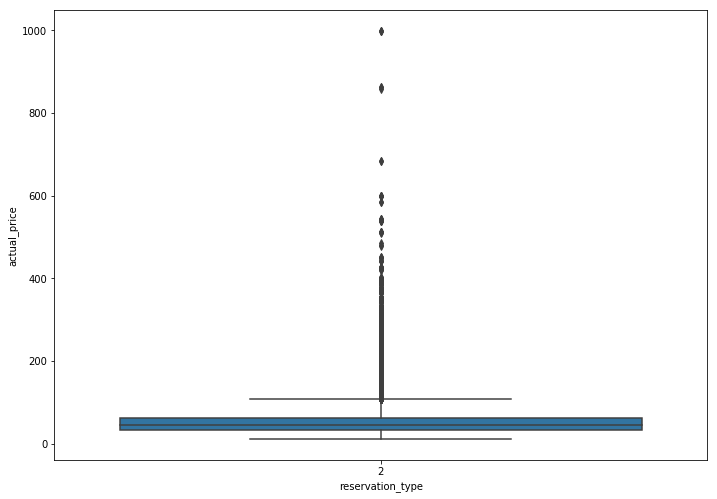

In [147]:
# Below you can see the median and lower/upper quartile of prices for vehicles with reservation_type == 2

# Building a Panda Series where all the reservation_type's are 2
res_2 = result[result['reservation_type'] == 2]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax2 = sns.boxplot(x="reservation_type", y="actual_price", data=res_2)

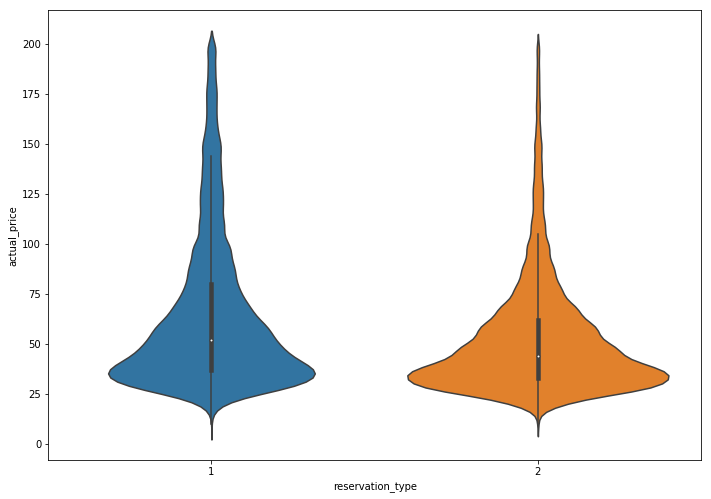

In [149]:
# In order to take a closer look at the median and lower/upper quartile, we want to display voilin plot of all 
# the cars priced a between the lower and upper quartile.

# Distribution of price points for reservation type
res_3 = result[result['actual_price'] < 200]
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax1 = sns.violinplot(x="reservation_type", y="actual_price", data=res_3)

In [122]:
################ MISC

In [ ]:
# Find all the vehicle_ids with a reservation_type of 1
one = result[result['reservation_type'] == 1]
one.head()

# Counts the highest number of rentals per vehicle ID
result_count = result['vehicle_id'].value_counts()
result_count.head(10)


### FOR RESERVATION_TYPE == 1

#Find count of all the vehicle_ids with a reservation_type of 1
one_sum = one['vehicle_id'].value_counts()
one_sum.size

# Plot a bar graph to find the shape
one_sum.plot.bar()
plt.axis('off')
plt.show()

#Pairplot for reservation_type == 2
sns.pairplot(one, king='reg')

### FOR RESERVATION_TYPE == 2

# Find all vehicle_ids with a reservation_type of 2
two = result[result['reservation_type'] == 2]
two.head()

# Find count of all the vehicle_ids with a reservation_type of 2
two_sum = two['vehicle_id'].value_counts()
two_sum.size

# Plot a bar graph to find the shape
two_sum.plot.bar()
plt.axis('off')
plt.show()

#Pairplot for reservation_type == 2
sns.pairplot(two, king='reg')